In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/2018-11-05-Treatd/twoColumnsOrdered.csv')

,value
count,48383.000000
mean,1.824566
std,4.271400
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,417.000000


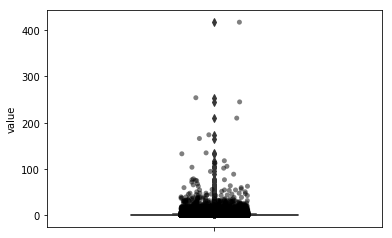

In [23]:
bplot = sns.boxplot(y='value', data=df, width=0.5, palette="colorblind")
bplot = sns.stripplot(y='value', data=df, jitter=True, marker="o", alpha=0.5, color='black')
df.describe()

,value
count,3753.000000
mean,8.670131
std,13.453204
min,4.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,417.000000


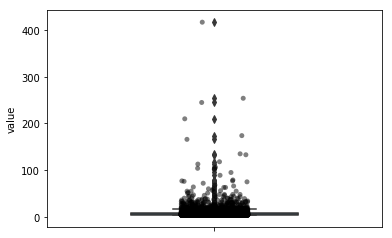

In [86]:
df2 = df.iloc[1:]
df2 = df[df.value>3]
bplot = sns.boxplot(y='value', data=df2, width=0.5, palette="colorblind")
bplot = sns.stripplot(y='value', data=df2, jitter=True, marker="o", alpha=0.5, color='black')
df2.describe()

,value
count,6077.000000
mean,6.501728
std,10.925064
min,3.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,417.000000


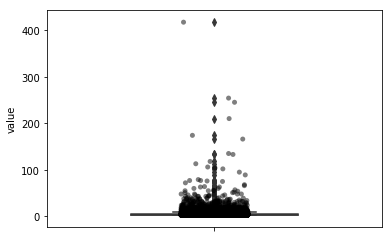

In [84]:
df3 = df.iloc[1:]
dft = df[df.value>2]
coefpos = dft.value.mean() + 2*dft.value.std()
coefneg = dft.value.mean() - 2*dft.value.std()
df3 = dft[(dft.value > coefneg)]
bplot = sns.boxplot(y='value', data=df3, width=0.5, palette="colorblind")
bplot = sns.stripplot(y='value', data=df3, jitter=True, marker="o", alpha=0.5, color='black')
df3.describe()

In [71]:
import scipy
import scipy.stats as st

dist_names = ['gamma', 'beta', 'rayleigh', "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
dist_results = []
params = {}

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(df.value)
    params[dist_name] = param
    
    D, p = st.kstest(df.value, dist_name, args=param)
    print("p value for "+dist_name+" = "+str(p))
    dist_results.append((dist_name, p))

best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
print("Best fitting distribution: "+str(best_dist))
print("Best p value: "+ str(best_p))
print("Parameters for the best fit: "+ str(params[best_dist]))


#fix, ax = plt.subplots(figsize=(16,8))
#ax.scatter(df['value'], df['value'])
#plt.show()

p value for gamma = 0.0
p value for beta = 0.0
p value for rayleigh = 0.0
p value for norm = 0.0
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 0.0
Best fitting distribution: gamma
Best p value: 0.0
Parameters for the best fit: (0.0034297159506861585, 0.9999999999999999, 1.6127563971103958)


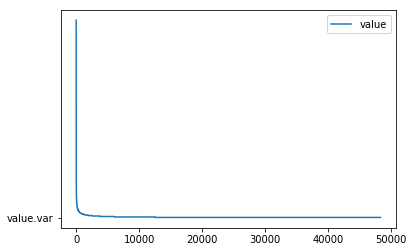

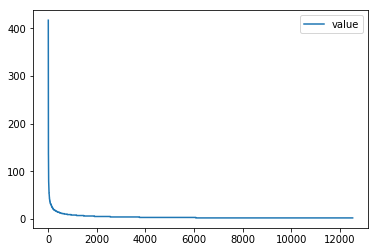

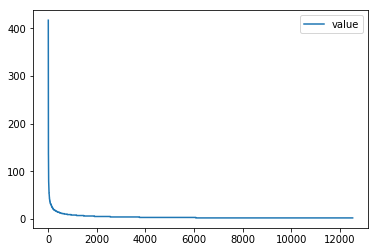

In [57]:
plt.plot('value', data=df)
plt.plot('value.var',data=df)
plt.legend()
df2.plot()
df3.plot()